# Exercise 05
**Integrante 1:** Ángela Patricia Ordoñez Castro...................................................**Código:** 201628709     
**Integrante 2:** Juan Sebastián Garcés Carranza.................................................**Código:** 201628949 



# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

# Solución:

# 5.1 Little Red Riding Hood Network

## Usando la función MLPClassifier de Scikitlearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
X = [[1,1,0,0],[0,1,1,0],[0,0,0,1]]
y = [[1,0,0,0],[0,0,1,1],[0,1,1,0]]

clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(3,))

clf.fit(X, y)     

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [3]:
def LRRH_NN(vals):
        return pd.DataFrame(np.matrix([['big ears', 'big teeth', 'handsome', 'wrinkled'],vals,
                        ['--------','--------','--------','--------'],
                        ['scream', 'hug', 'offer food', 'kiss cheek'],
                        [ '%.5f' % elem for elem in clf.predict_proba([vals]).tolist()[0]]]).T, 
             columns=['Caracteristica','input','','Acción','output'])

In [4]:
LRRH_NN([0,0,0,1])

,Caracteristica,input,,Acción,output
0,big ears,0,--------,scream,0.00000
1,big teeth,0,--------,hug,0.95386
2,handsome,0,--------,offer food,1.00000
3,wrinkled,1,--------,kiss cheek,0.21182


In [5]:
LRRH_NN([0,0,0,0])

,Caracteristica,input,,Acción,output
0,big ears,0,--------,scream,0.00418
1,big teeth,0,--------,hug,0.36389
2,handsome,0,--------,offer food,0.99710
3,wrinkled,0,--------,kiss cheek,0.31228


In [6]:
LRRH_NN([1,1,1,1])

,Caracteristica,input,,Acción,output
0,big ears,1,--------,scream,0.00021
1,big teeth,1,--------,hug,0.69884
2,handsome,1,--------,offer food,0.99988
3,wrinkled,1,--------,kiss cheek,0.27008


In [7]:
LRRH_NN([1,1,0,0])

,Caracteristica,input,,Acción,output
0,big ears,1,--------,scream,0.90158
1,big teeth,1,--------,hug,0.01549
2,handsome,0,--------,offer food,0.08161
3,wrinkled,0,--------,kiss cheek,0.43437


In [8]:
LRRH_NN([0,1,1,1])

,Caracteristica,input,,Acción,output
0,big ears,0,--------,scream,0.00003
1,big teeth,1,--------,hug,0.85560
2,handsome,1,--------,offer food,0.99999
3,wrinkled,1,--------,kiss cheek,0.24392


## Usando la función sequential de Keras

In [ ]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation

In [ ]:
model = Sequential()

model.add(Dense(output_dim=3, input_dim=4, activation='sigmoid'))
model.add(Dense(output_dim=4, activation="sigmoid"))

model.compile(loss='mse', 
              optimizer=SGD(lr = 1))

In [ ]:
model.fit(X, Y, nb_epoch=1000, batch_size=3,verbose=0)

In [ ]:
def LRRH_K(vals):
        return pd.DataFrame(np.matrix([['big ears', 'big teeth', 'handsome', 'wrinkled'],vals,
                        ['--------','--------','--------','--------'],
                        ['scream', 'hug', 'offer food', 'kiss cheek'],
                        [ '%.5f' % elem for elem in model.predict_proba([vals]).tolist()[0]]]).T, 
             columns=['Caracteristica','input','','Acción','output'])

In [ ]:
LRRH_K([1,1,0,0])

In [ ]:
LRRH_K([0,0,0,1])

In [ ]:
LRRH_K([1,1,1,1])

In [ ]:
LRRH_K([0,1,0,0])

In [ ]:
LRRH_K([1,0,0,1])


________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.

1. Load the dataset using `from sklearn.datasets import load_boston`.

In [18]:

from sklearn.datasets import load_boston
Boston=load_boston()
print(Boston.data.shape)

(506, 13)


La base Boston contiene 506 registros y 13 variables

2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.

In [19]:
from sklearn import datasets
Boston2=datasets.load_boston()

3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn.

In [20]:
import pandas as pd
Boston3= pd.DataFrame(Boston2.data, columns=Boston2.feature_names)
Boston3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Con el dataframe Boston3 podemos visualizar los 4 primeros registros de la base de datos con sus respestivas variables

4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.

In [21]:
MEDV=Boston.target
Boston3['MEDV']=MEDV
Boston3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Observamos que el nuevo dataframe contiene 14 varibles, la última variable corresponde a la variable de interés a predecir, la cual hace referencia al valor medio de las viviendas

5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

In [22]:
Boston3.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:
Using the DataFrame generated in the previous section:


1. Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'

In [23]:
Filtro1=Boston3[['LSTAT','INDUS','NOX','RM','AGE','MEDV']]
Filtro1.head()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7
3,2.94,2.18,0.458,6.998,45.8,33.4
4,5.33,2.18,0.458,7.147,54.2,36.2


2 Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?

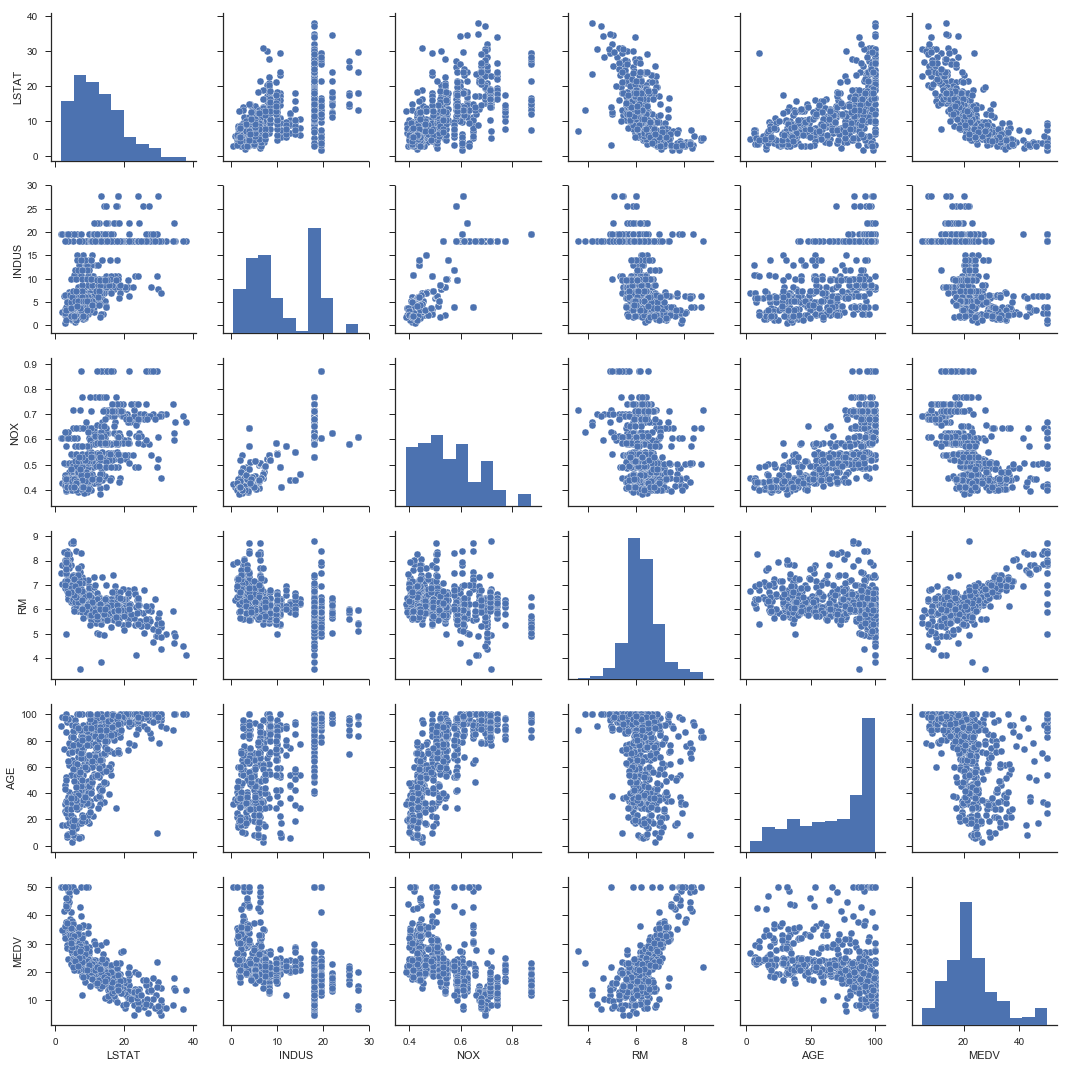

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Filtro1)
plt.show()

Visualmente se identifican relaciones entre algunas variables como por ejemplo LSTAT Y MEDV, donde se refleja una relación inversamente proporcional, dado que a medida que el valor de LSTAT se hace más pequeño, el valor de MEDV se hace más alto, y vicseversa; también se identifican relaciones directamente proporcionales entre algunas variables como NOX e INDUS o RM y MEDV.

3. Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [25]:
# Calcular matriz de correlaciones
corr=Filtro1.corr().abs()
corr

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,0.613808,0.602339,0.737663
INDUS,0.603800,1.000000,0.763651,0.391676,0.644779,0.483725
NOX,0.590879,0.763651,1.000000,0.302188,0.731470,0.427321
RM,0.613808,0.391676,0.302188,1.000000,0.240265,0.695360
AGE,0.602339,0.644779,0.731470,0.240265,1.000000,0.376955
MEDV,0.737663,0.483725,0.427321,0.695360,0.376955,1.000000


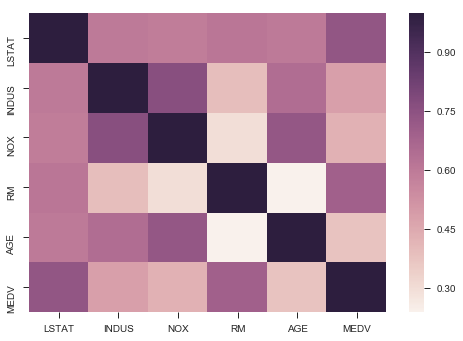

In [26]:
import seaborn as sns
sns.heatmap(corr)
plt.show()


Se identifican correlaciones fuertes entre las variables explicativas AGE,RM,NOX,INDUS, y LSTAT con la variable depentiente MEDV; la variable más correlacionada con MEDV es la variable LAST, seguida de la variable RM.
Así mismo se identifica que las variables explicativas más correlacionadas entre ellas son INDUS y NOX

## 4.4 Modeling linear and non linear relationships

1. Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [27]:
D1=Filtro1[['RM','MEDV']]
D2=Filtro1[['LSTAT','MEDV']]


In [28]:
D1.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [29]:
D2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $

In [30]:
from sklearn.model_selection import train_test_split
Train1, Test1 = train_test_split(D1,test_size=0.3, random_state=3)
Train2, Test2 = train_test_split(D2,test_size=0.3, random_state=3)

In [31]:
Train1.shape

(354, 2)

Probamos las muestras con el Train de la base D1, observamos que se obtienen 354 registros, los cuales corresponden al 70% de los registros totales de la base D1.

In [32]:
Test1.shape

(152, 2)

De la misma manera, se verifica que la muestra Test1 contiene el 30% de los registros de la base D1

2. Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_Train1=Train1[['RM']]
Y_Train1=Train1[['MEDV']]
X_Train2=Train2[['LSTAT']]
Y_Train2=Train2[['MEDV']]
X_Test1=Test1[['RM']]
Y_Test1=Test1[['MEDV']]
X_Test2=Test2[['LSTAT']]
Y_Test2=Test2[['MEDV']]

###  Base D1:

In [34]:
#Modelo lineal con D1:
ml = linear_model.LinearRegression()
Ml1=ml.fit(X_Train1,Y_Train1)
# Vemos el coeficiente de la variable RM:
print('Coefficients: \n', Ml1.coef_)
# El valor del intercepto:
print('Independent term: \n', Ml1.intercept_)
#El MSE para este modelo:
Y_pred1=Ml1.predict(X_Test1)
print("Mean squared error: %.2f" % mean_squared_error(Y_Test1, Y_pred1))

Coefficients: 
 [[ 9.29659592]]
Independent term: 
 [-35.74323818]
Mean squared error: 37.23


El MSE obtenido para este modelo es de 37.23, es un valor pequeño, lo cuál indica que la variable RM predice bien la variable MEDV; observando gráficamente el ajuste tenemos:

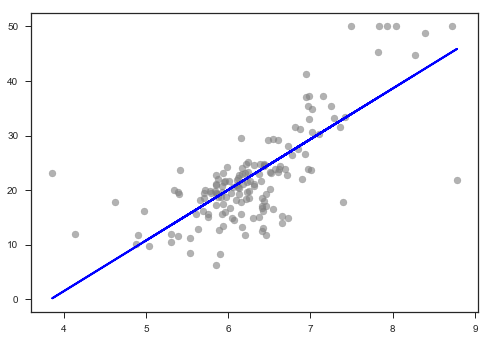

In [35]:
# Plot 
plt.scatter(X_Test1, Y_Test1, color='gray',alpha=.6)
plt.plot(X_Test1, Y_pred1, color='blue',
 linewidth=2, label=u'Regresión MCO')
plt.show()

En general se observa un buen ajuste del modelo 1 para la mayoría de los datos de la base D1.

### Base D2:

In [36]:
#Modelo lineal con D1:
ml = linear_model.LinearRegression()
Ml2=ml.fit(X_Train2,Y_Train2)
# Vemos el coeficiente de la variable RM:
print('Coefficients: \n', Ml2.coef_)
# El valor del intercepto:
print('Independent term: \n', Ml2.intercept_)
#El MSE para este modelo:
Y_pred2=Ml2.predict(X_Test2)
print("Mean squared error: %.2f" % mean_squared_error(Y_Test2, Y_pred2))

Coefficients: 
 [[-0.97952869]]
Independent term: 
 [ 35.04238673]
Mean squared error: 40.40


Para este caso, el coeficiente de la variable predictora es negarivo, dado que la relación de dependencia entre las variables LSTAT y MEDV es inversamente proporcional como se había denotado en el literal anterior.
EL MSE que se obtiene para este modelo también es pequeño,luego se pordría decir que la variable LSTAT es un buena predictora de la variable MEDV.
El ajuste del modelo, se puede observar gráficamente de la siguiente manera:


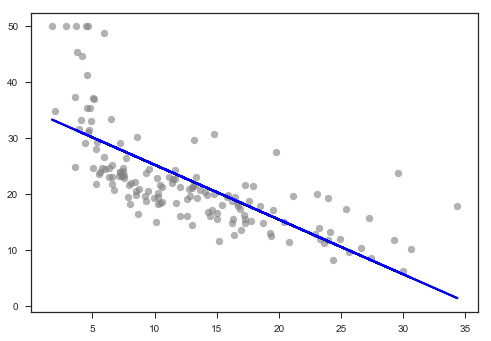

In [37]:
# Plot 
plt.scatter(X_Test2, Y_Test2, color='gray',alpha=.6)
plt.plot(X_Test2, Y_pred2, color='blue',linewidth=2)
plt.show()

Visualmente también se obsreva un buen ajuste de la recta a los datos de la base D2, la direciión de la recta refleja la relación inversamente proporcional entre las variables.

3. How does the model perform on 
D
1
D1
and 
D
2
D2
? Why

 De acuerdo a los valores de MSE obtenidos para cada modelo, se puede decir que el mejor modelo es el modelo 1, es decir el que se construyo con la variable predictora "RM", la cuál hace referencia al número de habitaciones dentro de las viviendad.
 De la misma manera el valor absoluto de los coeficientes de las variables predictoras obtenidos para cada modelo, reflejan que la variable "RM" tiene un mayor poder predictivo, dado que por un aumento en el número de habitaciones, el valor de la vivienda puede aumentar hasta 9.29 unidades su valor; mientras que el coeficiente obtenido para la variable "LSTAT" mediante el modelo 2, indica una reducción en el valor de las viviendas de solo 0,97 unidades por cada aumento en una unidad de la variable "LSTAT".

## 4.5 Training a regression model

1.Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)

In [38]:
from sklearn.model_selection import train_test_split
#Calculamos una muestra para Train y para Test de 70-30 respectivamente:
Train, Test = train_test_split(Boston3,test_size=0.3, random_state=2)
#Definimos las variables predictiras X y la variable a predecir Y en la muestra Train:
X_Train=Train.drop(['MEDV'],axis=1)
Y_Train=Train[['MEDV']]
#Definimos las variables predictiras X y la variable a predecir Y en la muestra Test:
X_Test=Test.drop(['MEDV'],axis=1)
Y_Test=Test[['MEDV']]

2.Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

In [39]:
# definimos la función de regresión lineal:
reg = linear_model.LinearRegression()
 
# Con la función definida entrenamos nuestro modelo
reg.fit(X_Train, Y_Train)

#El MSE para este modelo:
Y_pred=reg.predict(X_Test)
print("Mean squared error: %.2f" % mean_squared_error(Y_Test, Y_pred))

Mean squared error: 23.06


El valor del MSE obtenido con este modelo es de 23.06, menor al obtenido en los items anteriores, es decir que este modelo tiene un mejor ajuste.

3.Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set

In [40]:
from sklearn.neural_network import MLPRegressor
#Definimos la función MLP
MLP= MLPRegressor(random_state=881215)
#Con la función definida, entrenamos nuestro modelo
reg2 = MLP.fit(X_Train, Y_Train.values.ravel())
Y_pred2=reg2.predict(X_Test)
print("Mean squared error: %.2f" % mean_squared_error(Y_Test, Y_pred2))

Mean squared error: 29.44


* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(X_Train)
X_train_s = sc_x.transform(X_Train)
X_test_s = sc_x.transform(X_Test)

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set

In [42]:
# definimos la función de regresión lineal:
reg = linear_model.LinearRegression()
 
# Con la función definida entrenamos nuestro modelo
reg3=reg.fit(X_train_s, Y_Train)

#El MSE para este modelo:
Y_pred3=reg.predict(X_test_s)
print("Mean squared error: %.2f" % mean_squared_error(Y_Test, Y_pred3))

Mean squared error: 23.06


El valor del MSE obtenido para el modelo de regresión lineal para los datos escalados, es el mismo que el que se obtuvo con los daros no escalados.

 2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set

In [43]:
#Definimos la función MLP
MLP= MLPRegressor(random_state=880303,hidden_layer_sizes=(128,512), max_iter=1000)
#Con la función definida, entrenamos nuestro modelo
reg4 = MLP.fit(X_train_s, Y_Train.values.ravel())
Y_pred4=reg4.predict(X_test_s)
print("Mean squared error: %.2f" % mean_squared_error(Y_Test, Y_pred4))

Mean squared error: 10.90


El valor MSE que se obtiene con este último modelo de redes neuronales y datos escalados, es inferior al obtenido mediante redes neuronales y datos no escalados.

     3. Which model has better performance? Why?

El mejor modelo obtenido para predecir la variable MEDV es el modelo de redes neuronales con 128 neuronas en la primera capa y 512 en la segunda capa, debido a que con este se obtuvo el menor error de predicción.